# Conceptual Question 1 – ISLR (Python), Page 283

We compare **best subset**, **forward stepwise**, and **backward stepwise** selection procedures on the same dataset, generating \( p + 1 \) models each (ranging from 0 to \( p \) predictors).

---

## (a) Which of the three models with *k* predictors has the smallest training RSS?

**Answer:**  
**Best subset selection.**

**Explanation:**  
Best subset selection evaluates *all possible combinations* of \( k \) predictors and selects the model with the lowest residual sum of squares (RSS) on the training data. Forward and backward stepwise selection are greedy algorithms and do not guarantee identifying the global minimum RSS for a fixed number of predictors.

---

## (b) Which of the three models with *k* predictors has the smallest test RSS?

**Answer:**  
There is **no single method** that always yields the smallest test RSS.

**Explanation:**  
Test RSS reflects a model’s generalization ability. Best subset may overfit due to high variance (considering many models), while forward and backward stepwise selection, being more constrained, may sometimes perform better on unseen data. Performance depends on the specific dataset and the true underlying model.

---

## (c) True or False Statements

**i.** The predictors in the *k*-variable model identified by **forward stepwise** are a subset of those in the *(k+1)*-variable model from forward stepwise.  
**True** – Each additional step in forward stepwise adds one variable to the existing model.

**ii.** The predictors in the *k*-variable model identified by **backward stepwise** are a subset of those in the *(k+1)*-variable model from backward stepwise.  
**False** – Backward stepwise removes variables from the full model; the variable sets are not guaranteed to be nested in reverse.

**iii.** The predictors in the *k*-variable model from **backward stepwise** are a subset of those in the *(k+1)*-variable model from **forward stepwise**.  
**False** – These are different procedures and may yield different subsets entirely.

**iv.** The predictors in the *k*-variable model from **forward stepwise** are a subset of those in the *(k+1)*-variable model from **backward stepwise**.  
**False** – Forward and backward stepwise selection do not generate nested models relative to each other.

**v.** The predictors in the *k*-variable model from **best subset** are a subset of those in the *(k+1)*-variable model from best subset.  
**False** – Best subset does not guarantee nesting; the best \( k \)-variable model may contain different predictors than the best \( k+1 \)-variable model.

---

---


# Applied Question 8 — ISLR (Python), Page 286

In this exercise, we will generate simulated data, and then use this data to perform forward and backward stepwise selection, as well as lasso regression.

### (a)
Create a random number generator and use its `normal()` method to generate:
- A predictor `X` of length $n = 100$
- A noise vector $\epsilon$ of length $n = 100$

### (b)
Generate a response vector $Y$ of length 100 according to the model:

\[
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
\]

Choose constants for $\beta_0, \beta_1, \beta_2, \beta_3$.

### (c)
Use **forward stepwise selection** to select a model from the predictors $X, X^2, \dots, X^{10}$.

- What model is selected according to **Mallow's $C_p$**?
- Report the coefficients of the selected model.

### (d)
Repeat part (c) using **backward stepwise selection**.

- How does your result compare to part (c)?

### (e)
Fit a **lasso model** using the predictors $X, X^2, \dots, X^{10}$.

- Use cross-validation to select the optimal value of $\lambda$.
- Plot the cross-validation error as a function of $\lambda$.
- Report the resulting coefficient estimates and interpret them.

### (f)
Now generate a new response vector $Y$ according to the model:

\[
Y = \beta_0 + \beta_7 X^7 + \epsilon
\]

- Perform forward stepwise selection and lasso regression on this new model.
- Discuss the results obtained in terms of model recovery and sparsity.

---


## Part (a): Generate Predictor and Noise

We begin by generating simulated data using a random number generator. Specifically, we create:

- A predictor vector \( X \sim \mathcal{N}(0, 1) \) of length \( n = 100 \)
- A noise vector \( \epsilon \si


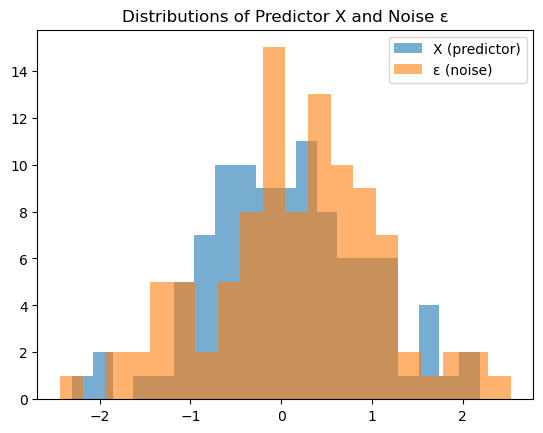

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1)

# Sample size
n = 100

# Generate predictor and noise
X = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)

# Optional: visualize the distributions
plt.hist(X, bins=20, alpha=0.6, label='X (predictor)')
plt.hist(epsilon, bins=20, alpha=0.6, label='ε (noise)')
plt.legend()
plt.title("Distributions of Predictor X and Noise ε")
plt.show()


## Part (b): Generate Response Vector \( Y \)

We generate the response variable \( Y \) according to the cubic polynomial model:

\[
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
\]

The coefficients are chosen as follows:
- \( \beta_0 = 1 \)
- \( \beta_1 = 2 \)
- \( \beta_2 = 3 \)
- \( \beta_3 = 4 \)

These values define a non-linear relationship that will be the basis for model selection in subsequent steps.


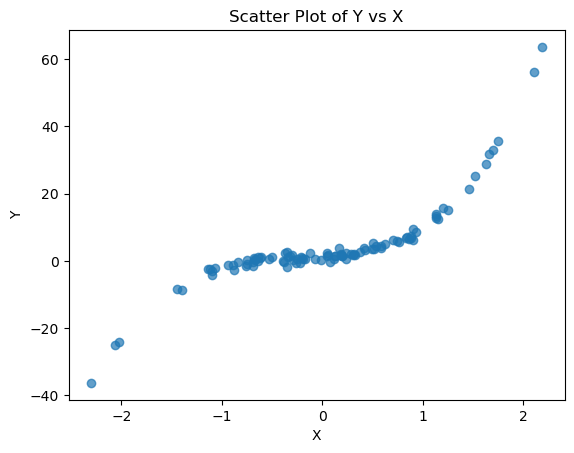

In [5]:
# Define coefficients
beta_0 = 1
beta_1 = 2
beta_2 = 3
beta_3 = 4

# Generate response Y using a cubic polynomial
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

# Optional: plot Y vs X to visualize non-linearity
plt.scatter(X, Y, alpha=0.7)
plt.title("Scatter Plot of Y vs X")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## Part (c): Forward Stepwise Selection

We use forward stepwise selection to choose a model from the set of predictors:

\[
X, X^2, X^3, \dots, X^{10}
\]

The model is selected based on **Mallow’s \( C_p \)** criterion. We then report the coefficients of the chosen model.
